<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/unsupervisedlearning_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans

In [2]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df=df.drop(columns='species',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df=df.drop_duplicates()

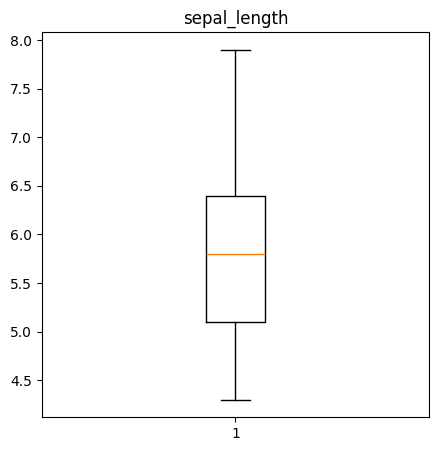

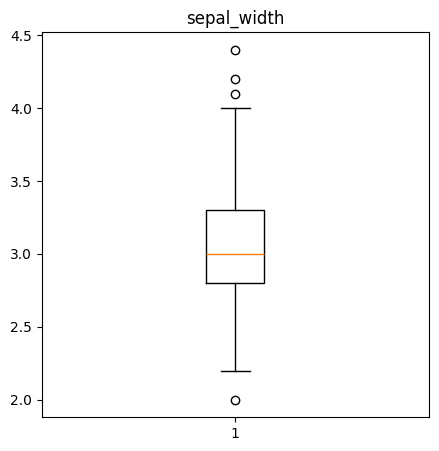

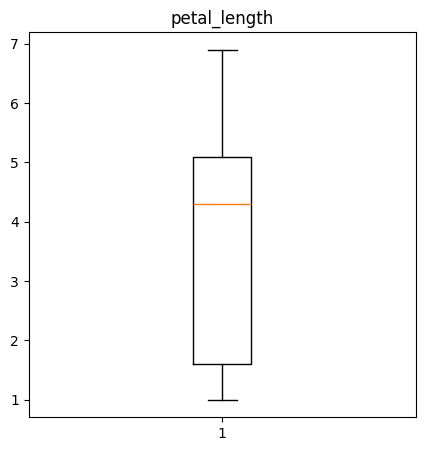

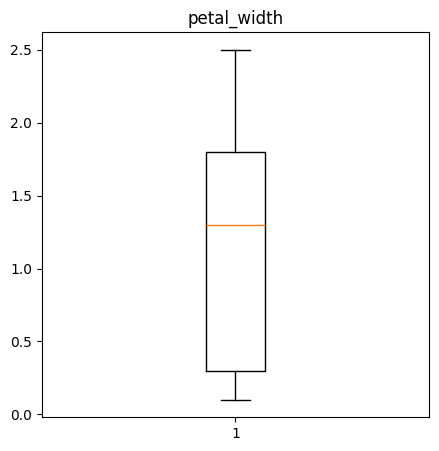

In [8]:
for i in df:
  plt.figure(figsize=(5,5))
  plt.boxplot(df[i])
  plt.title(i)

In [9]:
df['sepal_width']=winsorize(df['sepal_width'],limits=(0.01,0.01))

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

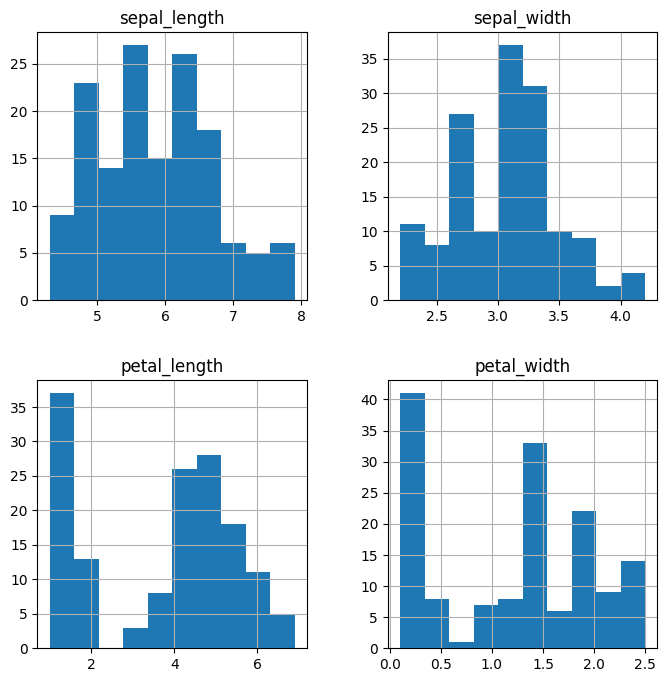

In [10]:
df.hist(figsize=(8,8))

In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.122669,0.873738,0.820620
sepal_width,-0.122669,1.000000,-0.429281,-0.366221
petal_length,0.873738,-0.429281,1.000000,0.962772
petal_width,0.820620,-0.366221,0.962772,1.000000


In [12]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [13]:
dt=sns.load_dataset('iris')
dt['species']=LabelEncoder().fit_transform(dt['species'])
dt['species']

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
dt['species'].unique()

array([0, 1, 2])

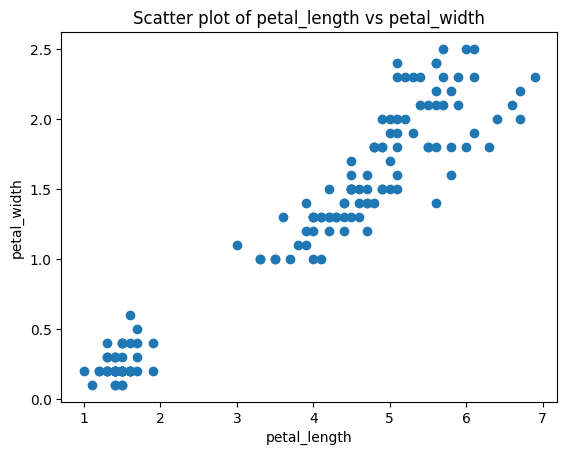

In [15]:
x=df[['petal_length','petal_width']]
plt.scatter(x['petal_length'],x['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter plot of petal_length vs petal_width')
plt.show()

In [16]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

[548.5880536912747,
 86.31128251300521,
 31.100968903436986,
 19.278502923976607,
 14.169397683511185,
 11.3511397312365,
 10.505434065934061,
 8.927920933555605,
 7.467388181993442,
 5.7077924430641795]

Text(0.5, 0, 'no.of clusters')

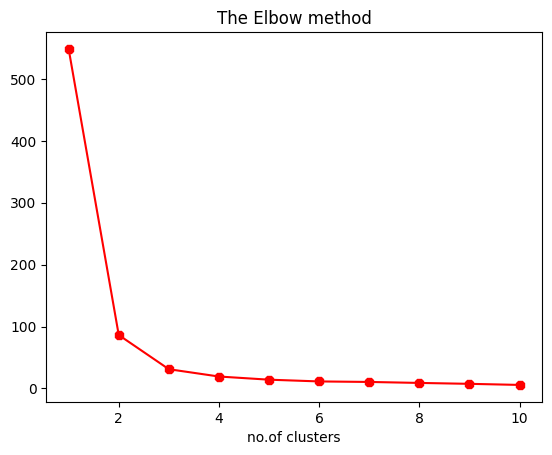

In [17]:
plt.plot(range(1,11),wcss,color='red',marker='8')
plt.title('The Elbow method')
plt.xlabel('no.of clusters')

In [18]:
df1=df.copy()

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)
df1['Cluster']=kmeans.predict(x)
df1

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)
df1['Cluster']=kmeans.labels_
df1

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [21]:
df1['Cluster'].unique()

array([1, 2, 0], dtype=int32)

In [22]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [23]:
df1['Cluster'].value_counts()

,count
Cluster,
2,52
1,50
0,47


In [24]:
kmeans.cluster_centers_

array([[5.60638298, 2.04042553],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

<Axes: xlabel='petal_length', ylabel='petal_width'>

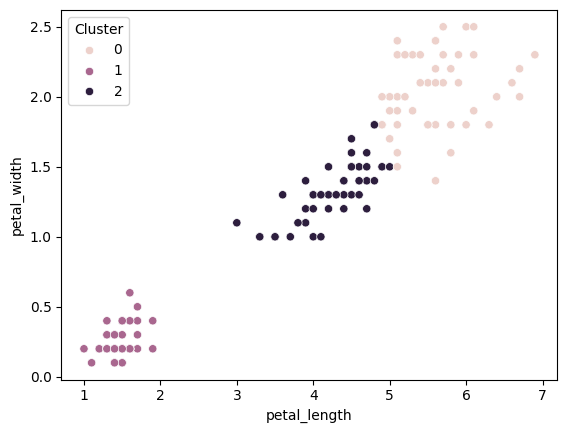

In [25]:
sns.scatterplot(x='petal_length',y='petal_width',hue='Cluster',data=df1)

In [26]:
cluster_summary=df1.groupby('Cluster')[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']].mean()
cluster_summary

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,6.663830,3.004255,5.606383,2.040426
1,5.006000,3.424000,1.462000,0.246000
2,5.907692,2.759615,4.269231,1.342308


In [27]:
cluster_labels={0:'Large',1:'Small',2:'Medium'}
df1['Customer group']=df1['Cluster'].map(cluster_labels)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster,Customer group
0,5.1,3.5,1.4,0.2,1,Small
1,4.9,3.0,1.4,0.2,1,Small
2,4.7,3.2,1.3,0.2,1,Small
3,4.6,3.1,1.5,0.2,1,Small
4,5.0,3.6,1.4,0.2,1,Small


In [28]:
from sklearn.metrics import silhouette_score

In [29]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(x)
score=silhouette_score(x,labels)
print('Silhouette score:',score)

Silhouette score: 0.6627361518433564


In [30]:
kmeans=KMeans(n_clusters=2,random_state=42)
labels=kmeans.fit_predict(x)
score=silhouette_score(x,labels)
print('Silhouette score:',score)

Silhouette score: 0.7648133744265083


In [31]:
kmeans=KMeans(n_clusters=4,random_state=42)
labels=kmeans.fit_predict(x)
score=silhouette_score(x,labels)
print('Silhouette score:',score)

Silhouette score: 0.6171574298701815


In [32]:
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [33]:
new_customer=np.array([[1.4,0.2]])
new_customer_scaled=scaler.transform(new_customer)
cluster_label=kmeans.predict(new_customer_scaled)
print(cluster_label[0])

1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [34]:
from scipy.cluster.hierarchy import dendrogram,linkage

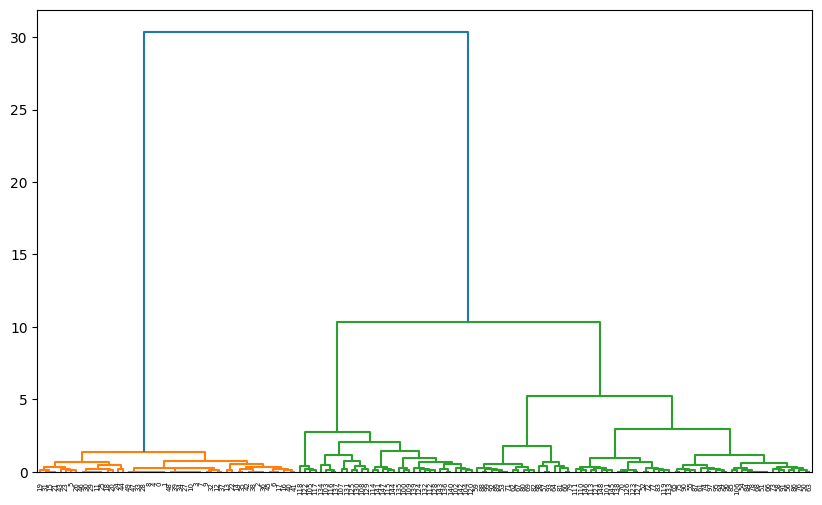

In [35]:
mergings=linkage(x,method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
agg_hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_label=agg_hc.fit_predict(x)
new_cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0])

In [38]:
score=silhouette_score(x,new_cluster_label)
score

np.float64(0.6555225174635378)

In [39]:
df1['agg_hc_cluster']=new_cluster_label
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster,Customer group,agg_hc_cluster
0,5.1,3.5,1.4,0.2,1,Small,1
1,4.9,3.0,1.4,0.2,1,Small,1
2,4.7,3.2,1.3,0.2,1,Small,1
3,4.6,3.1,1.5,0.2,1,Small,1
4,5.0,3.6,1.4,0.2,1,Small,1


In [40]:
df1['Cluster'].value_counts()

,count
Cluster,
2,52
1,50
0,47


In [41]:
df1['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,65
1,50
2,34


In [42]:
dt['species'].value_counts()

,count
species,
0,50
1,50
2,50


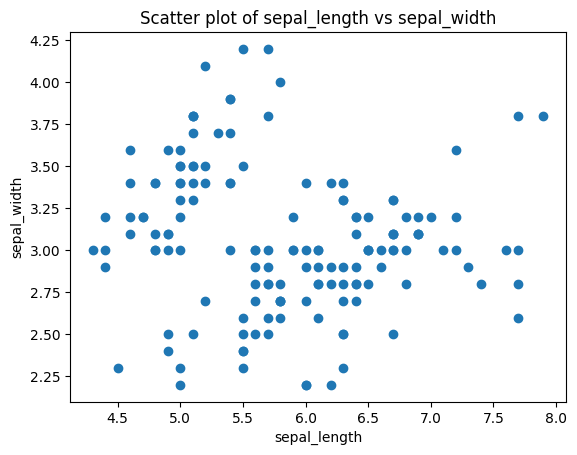

In [43]:
x1=df[['sepal_length','sepal_width']]
plt.scatter(x1['sepal_length'],x1['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter plot of sepal_length vs sepal_width')
plt.show()

In [44]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
wcss

[129.464832214765,
 56.800072806698225,
 36.46264058919804,
 27.904875770821153,
 20.42248351648353,
 17.885256826506836,
 15.117588190303355,
 12.551153846153849,
 11.733905168905173,
 9.996918755221389]

Text(0.5, 0, 'no.of clusters')

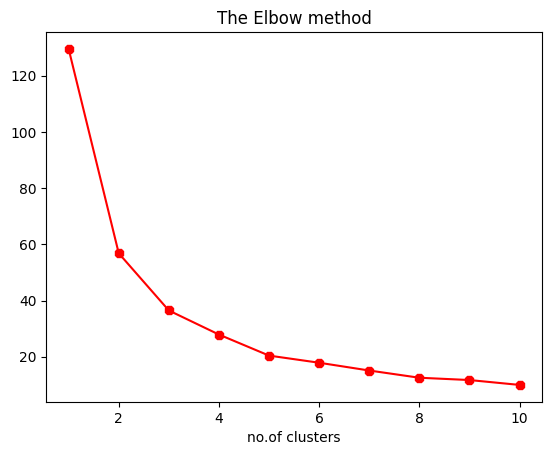

In [45]:
plt.plot(range(1,11),wcss,color='red',marker='8')
plt.title('The Elbow method')
plt.xlabel('no.of clusters')

In [46]:
df2=df.copy()

In [48]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)
df2['Cluster']=kmeans.predict(x)
df2

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [49]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)
df2['Cluster']=kmeans.labels_
df2

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [50]:
df2['Cluster'].value_counts()

,count
Cluster,
2,52
1,50
0,47


In [51]:
kmeans.cluster_centers_

array([[5.60638298, 2.04042553],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

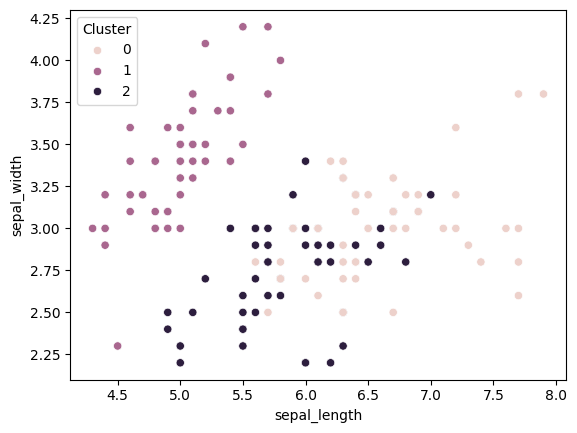

In [52]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='Cluster',data=df2)

In [53]:
cluster_summary=df1.groupby('Cluster')[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']].mean()
cluster_summary

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,6.663830,3.004255,5.606383,2.040426
1,5.006000,3.424000,1.462000,0.246000
2,5.907692,2.759615,4.269231,1.342308


In [54]:
cluster_labels={1:'Large',2:'Small',0:'Medium'}
df2['Customer group']=df2['Cluster'].map(cluster_labels)
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster,Customer group
0,5.1,3.5,1.4,0.2,1,Large
1,4.9,3.0,1.4,0.2,1,Large
2,4.7,3.2,1.3,0.2,1,Large
3,4.6,3.1,1.5,0.2,1,Large
4,5.0,3.6,1.4,0.2,1,Large


In [58]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(x1)
score=silhouette_score(x1,labels)
print('Silhouette score:',score)

Silhouette score: 0.4433960178577306


In [56]:
kmeans=KMeans(n_clusters=2,random_state=42)
labels=kmeans.fit_predict(x1)
score=silhouette_score(x1,labels)
print('Silhouette score:',score)

Silhouette score: 0.4681603138834957


In [59]:
scaler=StandardScaler()
scaled_x1=scaler.fit_transform(x1)

In [60]:
new_customer=np.array([[1.4,0.2]])
new_customer_scaled=scaler.transform(new_customer)
cluster_label=kmeans.predict(new_customer_scaled)
print(cluster_label[0])

2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


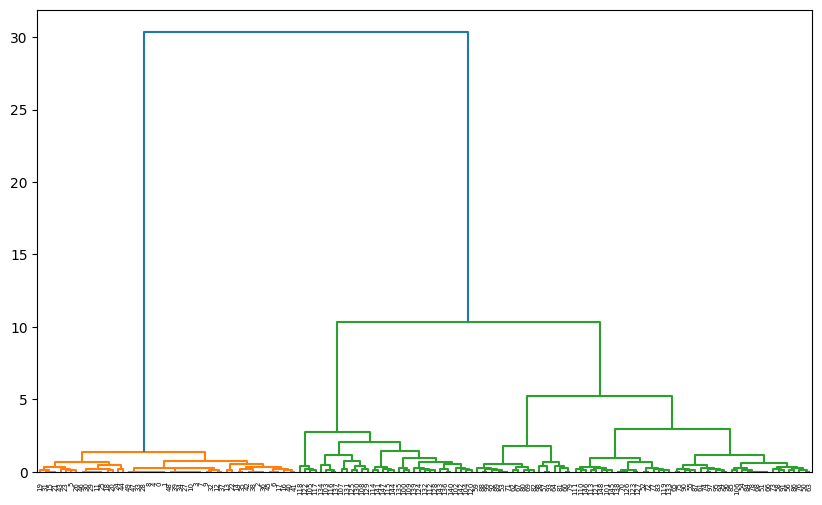

In [61]:
mergings=linkage(x,method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [62]:
agg_hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_label=agg_hc.fit_predict(x1)
new_cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [63]:
score=silhouette_score(x1,new_cluster_label)
score

np.float64(0.36623221148222)

In [64]:
df2['agg_hc_cluster']=new_cluster_label
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster,Customer group,agg_hc_cluster
0,5.1,3.5,1.4,0.2,1,Large,1
1,4.9,3.0,1.4,0.2,1,Large,1
2,4.7,3.2,1.3,0.2,1,Large,1
3,4.6,3.1,1.5,0.2,1,Large,1
4,5.0,3.6,1.4,0.2,1,Large,1


In [65]:
df2['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,64
1,56
2,29


In [66]:
df1['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,65
1,50
2,34
